<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_1_LSTM_Tutorial_v2_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on Learning Project: S&P 500 stock data


In [ ]:
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
# Load the stock data
stock_data = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/stock_data.csv')

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(stock_data[['Open', 'High', 'Low', 'Close', 'Volume']])
data_s = pd.DataFrame(data_scaled, columns=['Open', 'High', 'Low', 'Close', 'Volume'])
stock_data = data_s[['Open']].to_numpy()

In [ ]:
data_s

,Open,High,Low,Close,Volume
0,0.478567,0.497726,0.469931,0.499531,0.051098
1,0.502503,0.508390,0.501102,0.500469,0.042665
2,0.497966,0.505724,0.502361,0.509222,0.024962
3,0.528473,0.534577,0.533060,0.535480,0.062994
4,0.531915,0.535989,0.533375,0.538762,0.032843
...,...,...,...,...,...
3014,0.974969,0.978360,0.980479,0.978900,0.020720
3015,0.967459,0.970833,0.955447,0.952016,0.015136
3016,0.949155,0.956719,0.956392,0.955142,0.010099
3017,0.954631,0.954054,0.953558,0.951391,0.012876


In [ ]:
# Split the data into sequences for RNN input
sequence_length = 30
sequence_data = []
sequence_labels = []
for i in range(len(stock_data) - sequence_length):
    sequence_data.append(stock_data[i:i+sequence_length])
    sequence_labels.append(stock_data[i+sequence_length])
sequence_data = np.array(sequence_data)
sequence_labels = np.array(sequence_labels)

train_data = sequence_data[:2000]
train_labels = sequence_labels[:2000]
test_data = sequence_data[2000:]
test_labels = sequence_labels[2000:]

In [ ]:
# Split the data into training and testing sets
train_data = TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels))
test_data = TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels))

train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

## 1. Implement an RNN and train it using S&P 500 stock data?

Training: 100%|██████████| 5/5 [00:35<00:00,  7.03s/it]


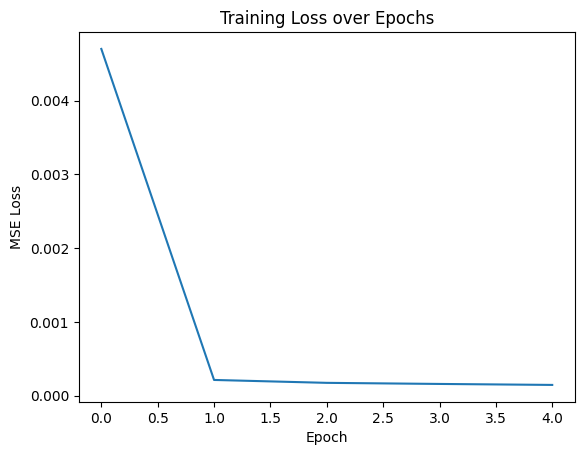

Test MSE: 0.010636047611000262


## 2. Implement an LSTM and train it using S&P 500 stock data?

Training:   0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training:  60%|██████    | 3/5 [00:11<00:08,  4.10s/it]